In [108]:
#importing the necessary libraries for plotting
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

#importing numpy and panda
import numpy as np
import pandas as pd

#librariers to build models and checking accuracy
import sklearn
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from statsmodels.formula.api import ols

#library to split data
from sklearn.model_selection import train_test_split

#library for EDA
from scipy.stats import zscore

#Library for saving data
import pickle

import warnings
warnings.filterwarnings('ignore')

In [109]:
df=pd.read_csv('Advertising.csv')
df.head(20)

,serial no,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [110]:
#drop unnecessary columns
df=df.drop(["serial no"],axis=1)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


dataframe has 5 column

1.label/target is sales

2.features are TV,radio and newspaper	

3.All are continous/numeric data

# EDA

In [112]:
#Checking null values
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

No null values present in the dataframe

In [113]:
#removing duplicate values
df.drop_duplicates(inplace=True)

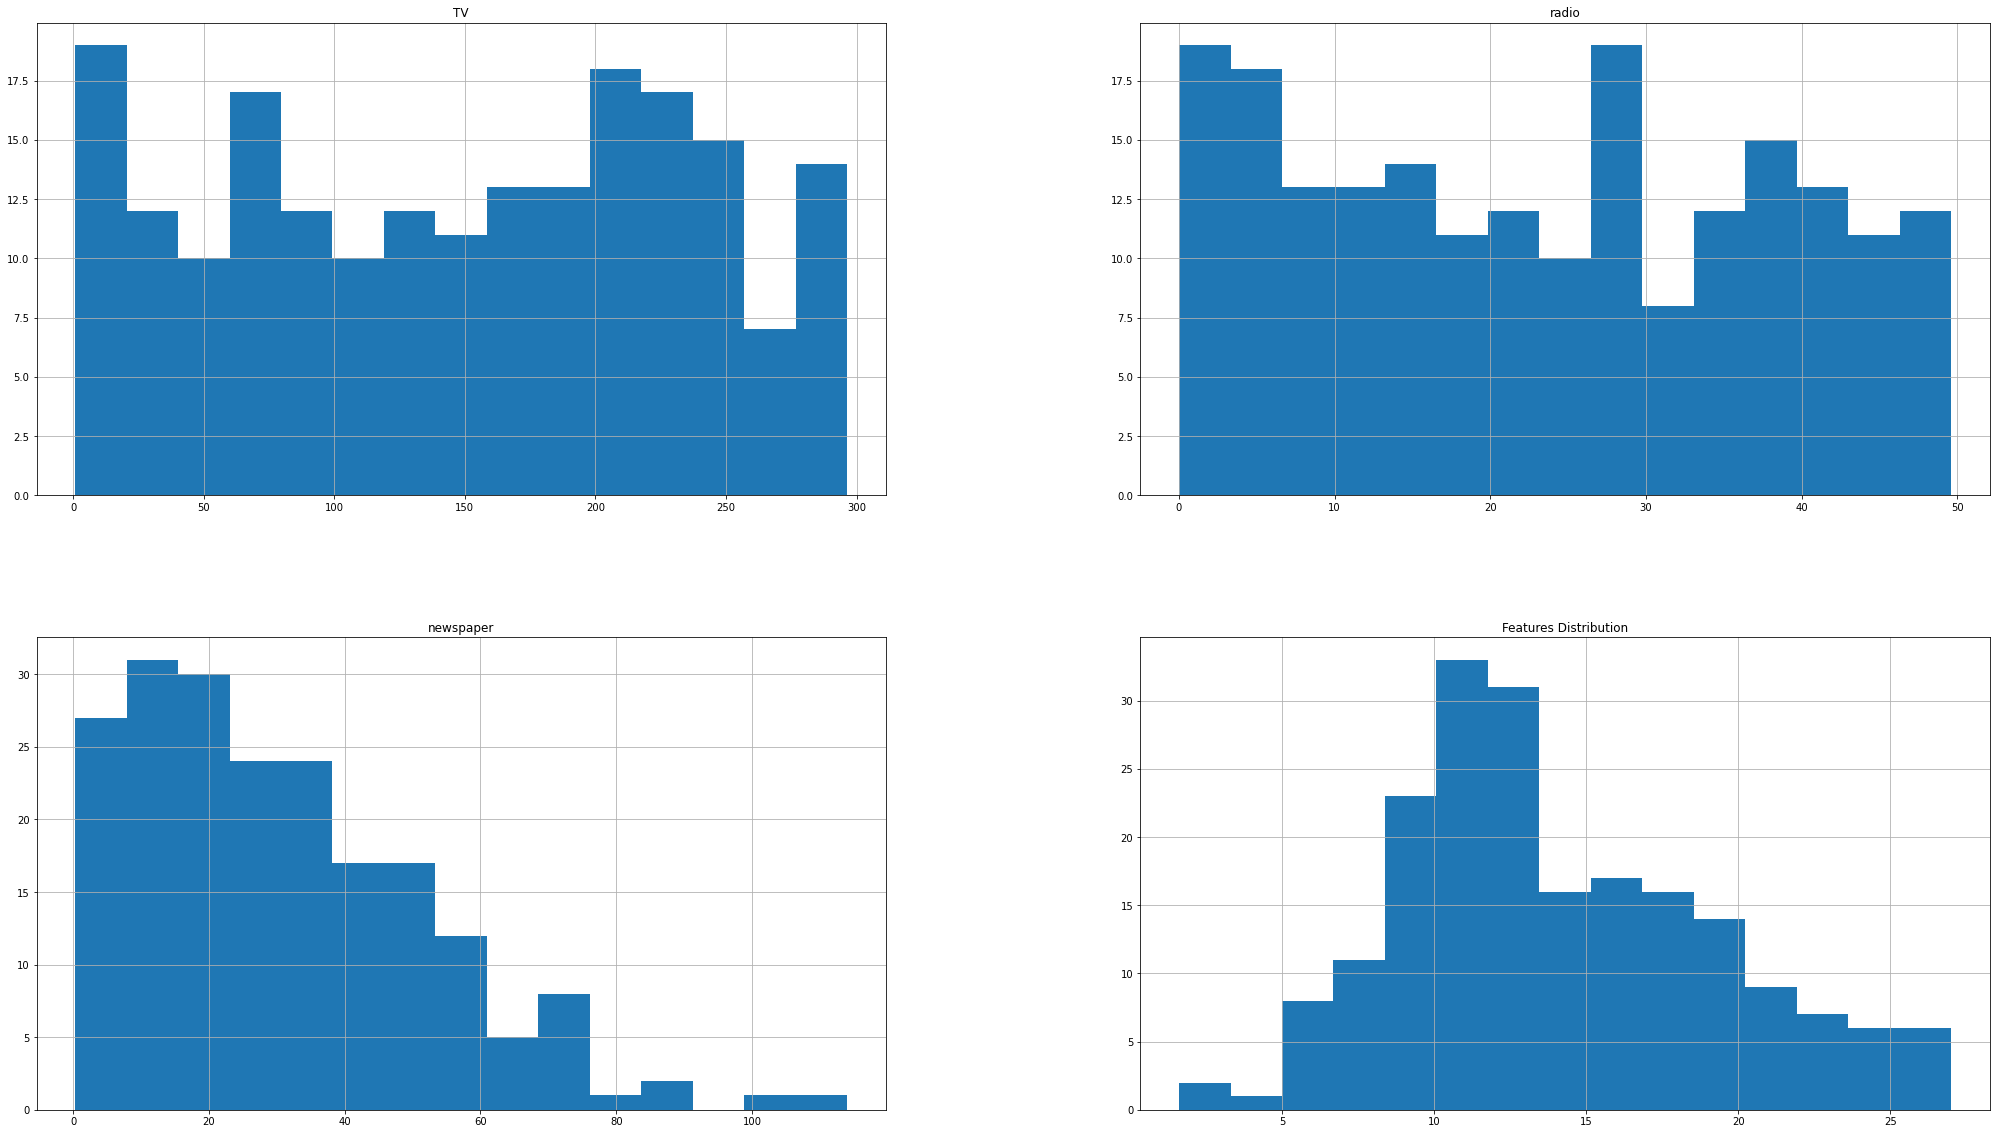

In [114]:
#checking for outliers
df.hist(figsize=(35,20),bins = 15)
plt.title("Features Distribution")
plt.show()


No outliers so not removing

In [115]:
# reducing skewness
x=df.drop(["sales"],axis=1)
x.skew()


TV          -0.069853
radio        0.094175
newspaper    0.894720
dtype: float64

In [116]:
#removing skewness using power transform
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

df_new=pd.DataFrame(df_new,columns=x.columns)

df_new.skew()

TV          -0.315199
radio       -0.242968
newspaper   -0.077942
dtype: float64

Skewness is reduced using the power transform

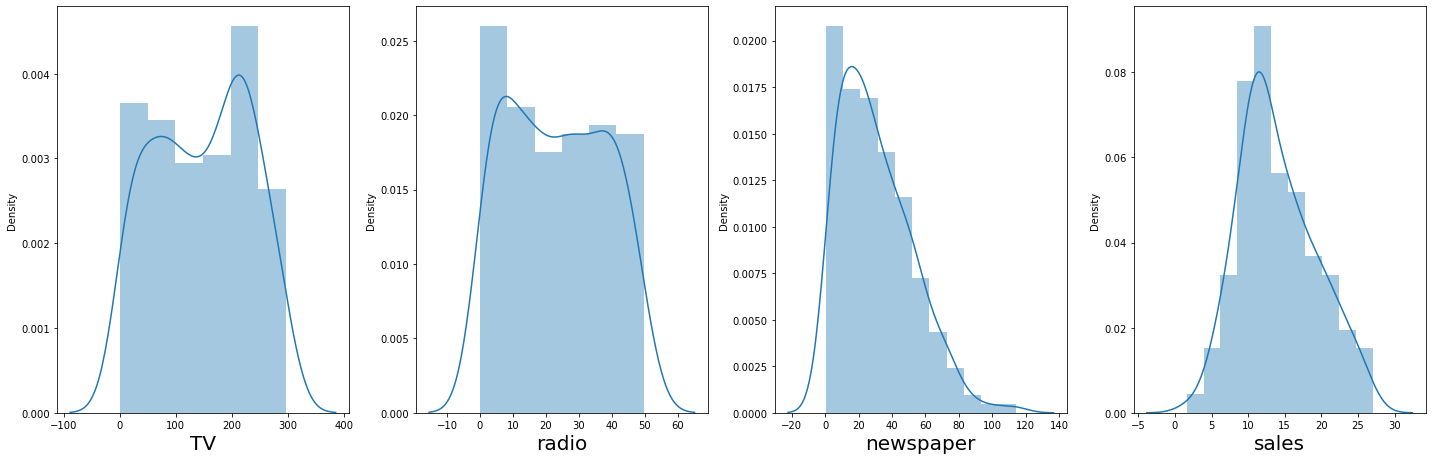

In [117]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=16:
       ax=plt.subplot(4,4,plotnumber)
       sns.distplot(df[column])         #distribution plot- we use for continous data
       plt.xlabel(column,fontsize=20)

    plotnumber+=1
plt.tight_layout()

In [118]:
#vif
x=df.drop(columns=["sales"])
y=df['sales']

In [119]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

scaler=StandardScaler()
x_scaler=scaler.fit_transform(x)

vif=pd.DataFrame()
vif["quality"]=[variance_inflation_factor(x_scaler,i) for i in range(x_scaler.shape[1])]
vif["feature"]=x.columns
vif

,quality,feature
0,1.004611,TV
1,1.144952,radio
2,1.145187,newspaper


Multicollinearity much is not seen

In [120]:
#understanding the relationship between independent variable with label
data_corr=df.corr()
data_corr["sales"].sort_values(ascending=False)

sales        1.000000
TV           0.782224
radio        0.576223
newspaper    0.228299
Name: sales, dtype: float64

Newspaper has little relationship with sales as compared to TV and radio

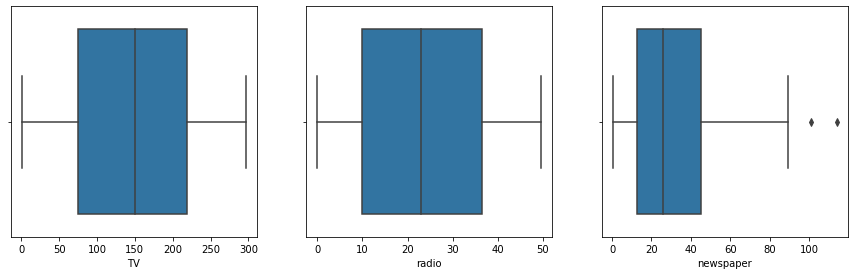

In [121]:
x=df.drop("sales",axis=1)
y=df["sales"]

plt.figure(figsize=(15,50))
graph=1

for column in x:
    if graph<=30:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(x[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
    
plt.show()

TV minimum starts at 0 and maximum is at 300. Its largest values lies in 150. The curve is normalised, showing it has high impact on Sales

Radio minimum starts at 0 and maximum upto 50

Newspaper minimum starts at 0 and maximum upto 95

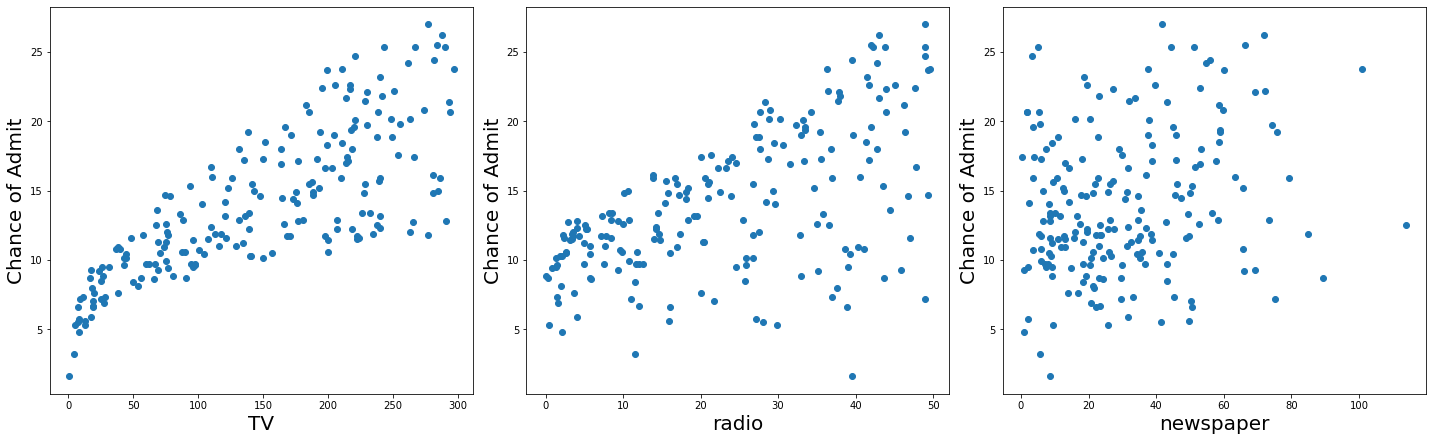

In [122]:
#visualising the relationship
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in x:
    if plotnumber<=15:
        X=plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit',fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Train test split

In [123]:
x=df.drop(columns=["sales"])
y=df['sales']

In [124]:
#scaling
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

In [125]:
#splitting the data into train and test
x_train, x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=10)

In [126]:
y_train.head()

24      9.7
43     12.9
101    23.8
163    18.0
21     12.5
Name: sales, dtype: float64

# Finding best random state

In [127]:
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train, x_test,y_train, y_test=train_test_split(x_scaled,y,test_size=.25,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    r2=r2_score(y_test,predrf)
    if r2>maxAccu:
        maxr2=r2
        maxRS=i

print("Best r2 score is", maxr2,"on Random State",maxRS)

Best r2 score is 0.8565135936400855 on Random State 199


We found best random_state value as 85% .We will create our train_test split using the random_state(199)

# Testing various models

In [128]:
x_train, x_test,y_train, y_test=train_test_split(x_scaled,y,test_size=.25,random_state=maxRS)

In [129]:
#Linear Regression
from sklearn.linear_model import LinearRegression

LR=LinearRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print("r2 score of LinearRegression model is",r2_score(y_test,predlr))

r2 score of LinearRegression model is 0.8565135936400855


In [130]:
#OLS regression
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

lm=ols(formula='sales~TV +radio+newspaper',data=df)
lm=lm.fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 17 Jul 2021   Prob (F-statistic):           1.58e-96
Time:                        16:43:51   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [131]:
#DecisionTreeClassifier

dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
predlr=LR.predict(x_test)
print("r2 score of DecisionTreeRegressor model is",r2_score(y_test,predlr))

r2 score of DecisionTreeRegressor model is 0.8565135936400855


In [132]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predlr=LR.predict(x_test)
print("r2 score of RandomForestRegressor model is",r2_score(y_test,predlr))

r2 score of RandomForestRegressor model is 0.8565135936400855


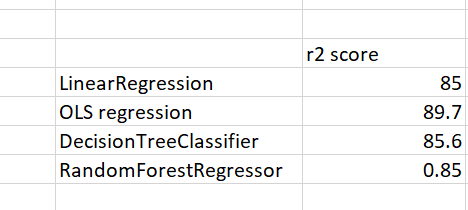

In [133]:
#cross validation
#Finding overfitting
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
import statsmodels.api

scr=cross_val_score(LR,x,y,cv=5)
print("Cross validation score of Linear Regression model :", scr.mean())

scr=cross_val_score(dt,x,y,cv=5)
print("Cross validation score of Decision Tree model :", scr.mean())

scr=cross_val_score(rf,x,y,cv=5)
print("Cross validation score of Random Forest model :", scr.mean())


Cross validation score of Linear Regression model : 0.8871063495438435
Cross validation score of Decision Tree model : 0.9497262006534566
Cross validation score of Random Forest model : 0.9747178501587672


In [134]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 17 Jul 2021   Prob (F-statistic):           1.58e-96
Time:                        16:43:52   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

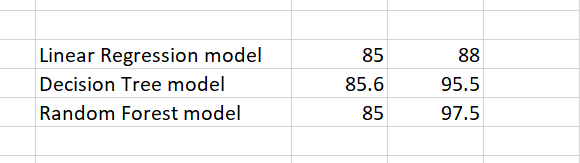

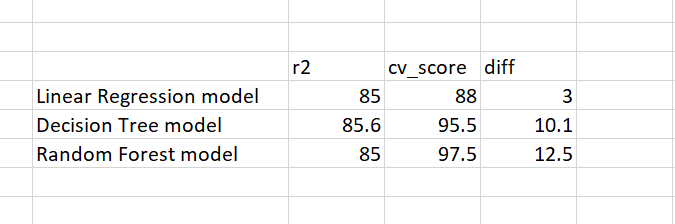

Best model is LinearRegression

In [135]:
#Hyperparameter Tuning
from sklearn.model_selection import train_test_split

#splitting the data into train and test
x_train, x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=10)

In [136]:
parameters = {'fit_intercept':['True', 'False'],
               'normalize':['True', 'False'],
                'copy_X':['True', 'False'],
 }


In [137]:
from sklearn.model_selection import GridSearchCV 
GCV=GridSearchCV(lreg,parameters,cv=5)


In [138]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': ['True', 'False'],
                         'fit_intercept': ['True', 'False'],
                         'normalize': ['True', 'False']})

In [139]:
GCV.best_params_

{'copy_X': 'True', 'fit_intercept': 'True', 'normalize': 'True'}

In [140]:
mod=LinearRegression(copy_X='True', fit_intercept='True', normalize='True')

In [141]:
mod.fit(x_train,y_train)

LinearRegression(copy_X='True', fit_intercept='True', normalize='True')

In [142]:
pred=mod.predict(x_test)
print(r2_score(y_test,pred)*100)

83.6684397405522


In [143]:
#score of model after hypertuning
from sklearn.metrics import r2_score
print("The r2_score of the model is \n_____________\n")
r2_score(y_test, testResult)


The r2_score of the model is 
_____________



0.8366406401479453

In [144]:
#ROC AUC score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [145]:
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
lr=LinearRegression()

lr.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)


RandomForestRegressor()

In [146]:
lr.score(x_test,y_test)
dt.score(x_test,y_test)
rf.score(x_test,y_test)


0.9718132324063936

In [147]:
print("r2 score of random forest regressor is",r2_score(y_test,rf.predict(x_test)))

r2 score of random forest regressor is 0.9718132324063936


In [148]:
print("r2 score of decision tree classifier is",r2_score(y_test,dt.predict(x_test)))

r2 score of decision tree classifier is 0.9363638059154696


In [149]:
print("r2 score of linear regression is",r2_score(y_test,lr.predict(x_test)))

r2 score of linear regression is 0.8366843974055227


In [150]:
#Saving
LinearRegression_tree_model=LinearRegression()
LinearRegression_tree_model.fit(x_train,y_train)

filename='finalized_model.pickle'
pickle.dump(LinearRegression_tree_model,open(filename,'wb'))

In [159]:
#prediction using the saved model
loaded_model=pickle.load(open(filename,'rb'))
a=loaded_model.predict(scaler.transform([[180.8,10.8,58.4]]))
print("predicted value using the model is",a)

predicted value using the model is [13.09548348]


In [153]:
#Adjusted R2
print("adjusted r2 of linear regression saved model is",LinearRegression_tree_model.score(x_train,y_train))

adjusted r2 of linear regression saved model is 0.9238935852366272


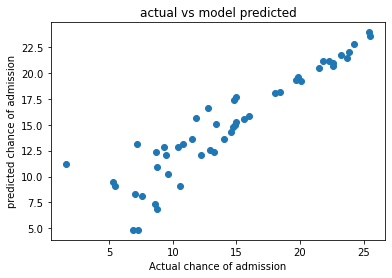

In [154]:
#plotting scatter plot
y_pred=LinearRegression_tree_model.predict(x_test)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual chance of admission')
plt.ylabel('predicted chance of admission')
plt.title('actual vs model predicted')
plt.show()

the scatter plot shows that the predicted and the test values are almost equal, proving this to be an efficient model

In [155]:
#Regularisation
from sklearn.linear_model import Lasso,LassoCV

lasscv=LassoCV(alphas=None, max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

#best alpha parameter
alpha=lasscv.alpha_

lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

lasso_reg.score(x_test,y_test)

0.8365581907136211